<a href="https://colab.research.google.com/github/Animesh1911/Cardiovascular_Disease_Prediction/blob/main/ECE1030_Cardiovascular_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT NAME** - *Cardiovascular Disease Prediction*

The aim of this project is to predict whether a person has cardiovascular disease or not based on various features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Cardiovascular Disease Prediction/cardio_train.csv',delimiter=';')

##**PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

In [ ]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


**Independent Features:**

>Age (in days), Gender (1-Female, 2-Male), Height, Weight, Systolic BP, Diastolic BP,

>Cholesterol -  1 normal, 2 above normal, 3 well above normal

>Glucose - 1 normal, 2 above normal, 3 well above normal

>Smoking, Alcohol intake, Physical activity

**Dependent/Output Feature:**

>Cardiovascular Disease

In [ ]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


We can see that there are various outliers in **'ap_hi'** and **'ap_lo'** columns since the  standard deviation value is too high. We can also see that the maximum and minimum values in these two columns are too high and negative respectively which is not possible for any Blood Pressure value.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are no missing values in the data.

In [ ]:
data.drop('id',axis=1,inplace=True)

In [ ]:
data['age'] = round(data['age']//365.25)

Converting the age values from days to years.

In [ ]:
data['gender'] = data['gender'] - 1

Female - 0, 
Male - 1

In [ ]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,47,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,168,76.0,120,80,1,1,1,0,1,0
69996,61,0,158,126.0,140,90,2,2,0,0,1,1
69997,52,1,183,105.0,180,90,3,1,0,1,0,1
69998,61,0,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
data.corr()

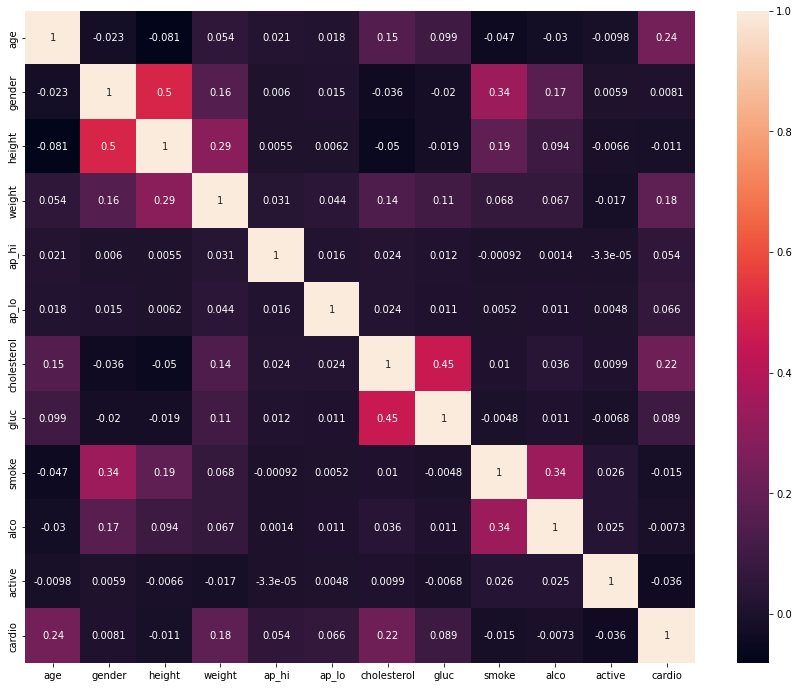

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

The main causes of cardiovascular disease are **high blood pressure, overweight, smoking and cholestrol.**

From this correlation graph we can see **that only age, weight and cholestrol are having some impact on the output variable. Also, blood pressure is not having any importance on the output.** This is due to the pressence of outliers.

We also know that cholestrol and glucose have 3 different levels. So we should also try to figure out which level affects the output the most.

In [ ]:
data['cholesterol'] = data['cholesterol'].map({1:"chol_1",2:"chol_2",3:"chol_3"})

data['gluc'] = data['gluc'].map({1:"gluc_1",2:"gluc_2",3:"gluc_3"})

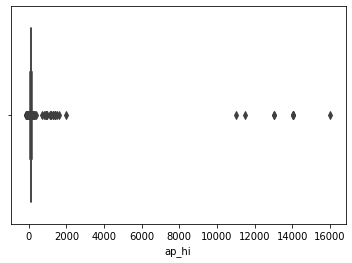

In [ ]:
sns.boxplot(x=data['ap_hi'])

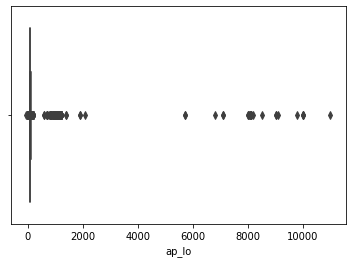

In [ ]:
sns.boxplot(x=data['ap_lo'])

We are going to remove the outliers in **ap_hi** and **ap_lo** as these values are not measured correctly and can impact the performance of our model.



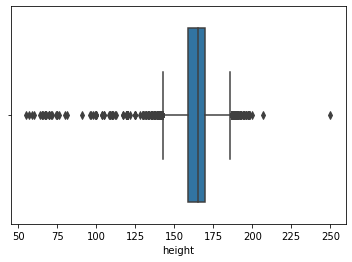

In [ ]:
sns.boxplot(x=data['height'])

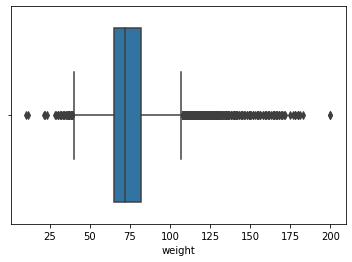

In [ ]:
sns.boxplot(x=data['weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


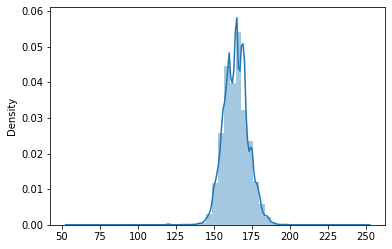

In [ ]:
sns.distplot(x=data['height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


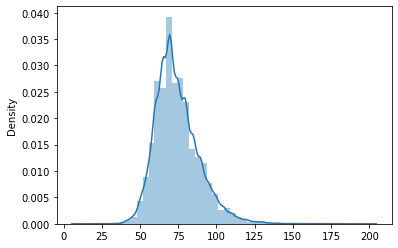

In [ ]:
sns.distplot(x=data['weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


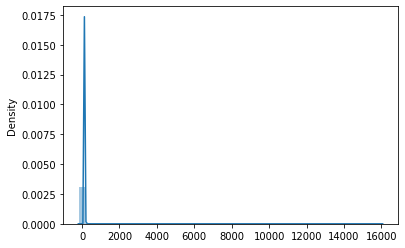

In [ ]:
sns.distplot(x=data['ap_hi'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


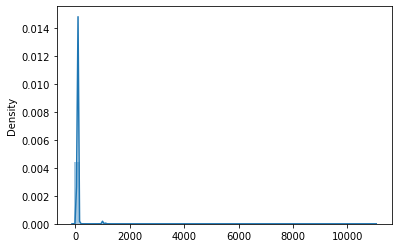

In [ ]:
sns.distplot(x=data['ap_lo'])

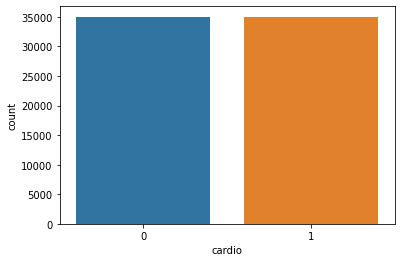

In [ ]:
sns.countplot(x=data['cardio'])

This is a balanced dataset since the count of each of the output classes is same.

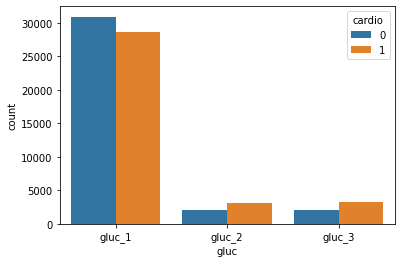

In [ ]:
sns.countplot(x=data['gluc'],hue=data['cardio'])

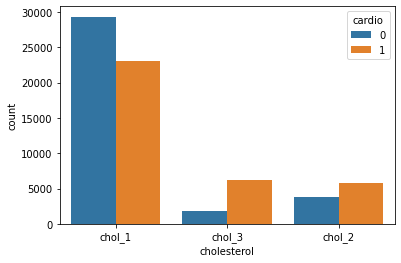

In [ ]:
sns.countplot(x=data['cholesterol'],hue=data['cardio'])

We can see that as the levels of glucose and cholestrol are increases, the chances of having cardiovascular disease may increase.

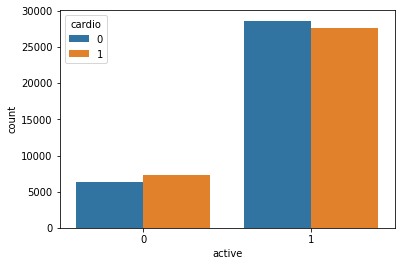

In [ ]:
sns.countplot(x=data['active'],hue=data['cardio'])

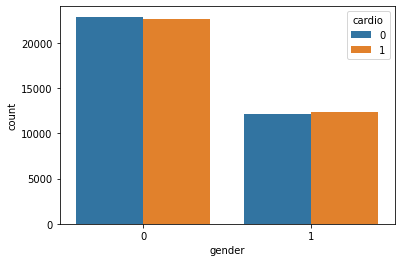

In [ ]:
sns.countplot(x=data['gender'],hue=data['cardio'])

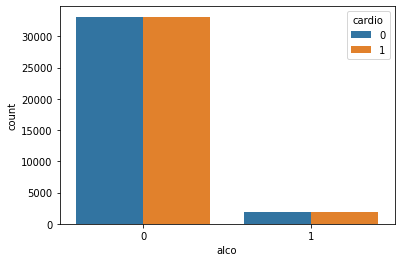

In [ ]:
sns.countplot(x=data['alco'],hue=data['cardio'])

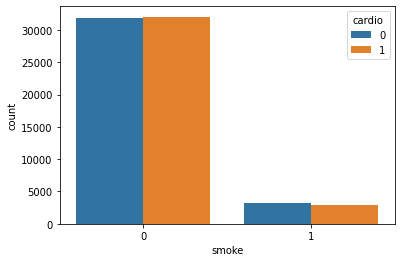

In [ ]:
sns.countplot(x=data['smoke'],hue=data['cardio'])

In [ ]:
def remove_outliers(arr):
    q1 = np.percentile(arr,25)
    q3 = np.percentile(arr,75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in range(0,len(arr)):
        if arr[i] >= upper_bound or arr[i] <= lower_bound:
            arr[i] = np.nan

In [ ]:
remove_outliers(data['ap_hi'])

In [ ]:
remove_outliers(data['ap_lo'])

In [ ]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110.0,80.0,chol_1,gluc_1,0,0,1,0
1,55,0,156,85.0,140.0,90.0,chol_3,gluc_1,0,0,1,1
2,51,0,165,64.0,130.0,70.0,chol_3,gluc_1,0,0,0,1
3,48,1,169,82.0,150.0,100.0,chol_1,gluc_1,0,0,1,1
4,47,0,156,56.0,100.0,NaN,chol_1,gluc_1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,168,76.0,120.0,80.0,chol_1,gluc_1,1,0,1,0
69996,61,0,158,126.0,140.0,90.0,chol_2,gluc_2,0,0,1,1
69997,52,1,183,105.0,NaN,90.0,chol_3,gluc_1,0,1,0,1
69998,61,0,163,72.0,135.0,80.0,chol_1,gluc_2,0,0,0,1


In [ ]:
data = data.dropna()

Dropping the outliers from data.

In [ ]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110.0,80.0,chol_1,gluc_1,0,0,1,0
1,55,0,156,85.0,140.0,90.0,chol_3,gluc_1,0,0,1,1
2,51,0,165,64.0,130.0,70.0,chol_3,gluc_1,0,0,0,1
3,48,1,169,82.0,150.0,100.0,chol_1,gluc_1,0,0,1,1
5,59,0,151,67.0,120.0,80.0,chol_2,gluc_2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,0,165,80.0,150.0,80.0,chol_1,gluc_1,0,0,1,1
69995,52,1,168,76.0,120.0,80.0,chol_1,gluc_1,1,0,1,0
69996,61,0,158,126.0,140.0,90.0,chol_2,gluc_2,0,0,1,1
69998,61,0,163,72.0,135.0,80.0,chol_1,gluc_2,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63710 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          63710 non-null  int64  
 1   gender       63710 non-null  int64  
 2   height       63710 non-null  int64  
 3   weight       63710 non-null  float64
 4   ap_hi        63710 non-null  float64
 5   ap_lo        63710 non-null  float64
 6   cholesterol  63710 non-null  object 
 7   gluc         63710 non-null  object 
 8   smoke        63710 non-null  int64  
 9   alco         63710 non-null  int64  
 10  active       63710 non-null  int64  
 11  cardio       63710 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 6.3+ MB


In [ ]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000
mean,52.856286,0.352143,164.470899,74.215650,126.359724,81.733574,0.087679,0.052849,0.803532,0.496139
std,6.736218,0.477642,8.144930,14.079373,13.758444,7.600795,0.282829,0.223733,0.397330,0.499989
min,29.000000,0.000000,55.000000,11.000000,95.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,1.000000,250.000000,200.000000,169.000000,104.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Chol = pd.get_dummies(data['cholesterol'])
Gluc = pd.get_dummies(data['gluc'])

data = pd.concat([data,Chol,Gluc],axis=1)

In [ ]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
0,50,1,168,62.0,110.0,80.0,chol_1,gluc_1,0,0,1,0,1,0,0,1,0,0
1,55,0,156,85.0,140.0,90.0,chol_3,gluc_1,0,0,1,1,0,0,1,1,0,0
2,51,0,165,64.0,130.0,70.0,chol_3,gluc_1,0,0,0,1,0,0,1,1,0,0
3,48,1,169,82.0,150.0,100.0,chol_1,gluc_1,0,0,1,1,1,0,0,1,0,0
5,59,0,151,67.0,120.0,80.0,chol_2,gluc_2,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,0,165,80.0,150.0,80.0,chol_1,gluc_1,0,0,1,1,1,0,0,1,0,0
69995,52,1,168,76.0,120.0,80.0,chol_1,gluc_1,1,0,1,0,1,0,0,1,0,0
69996,61,0,158,126.0,140.0,90.0,chol_2,gluc_2,0,0,1,1,0,1,0,0,1,0
69998,61,0,163,72.0,135.0,80.0,chol_1,gluc_2,0,0,0,1,1,0,0,0,1,0


In [ ]:
data.corr()

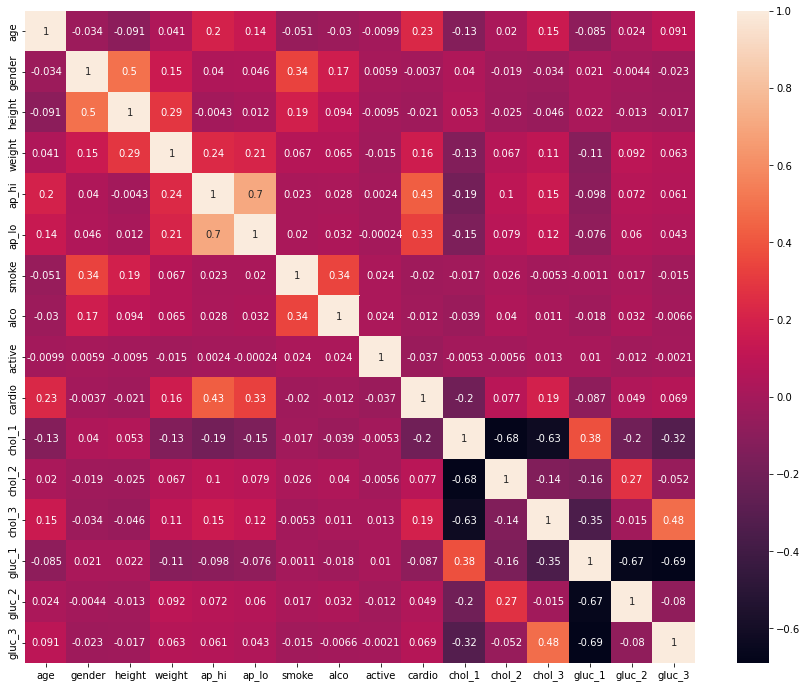

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

After the preprocessing, we can clearly see which feature contributes directly and indirectly to the output variable.

1.   Age, weight and level 3 cholesterol contribute **positively** to the output.
2.   Systolic BP and Diastolic BP contribute **very positively** to the output.
3.   Level 1 cholesterol contribute **negatively** to the output.

Rest of the features do not have much effect on the output.

We can also note that each level of cholestrol is highly correlated to the corresponding same level of glucose. This means that if a person has level 3 cholestrol, the chance of hiim/her having level 3 glucose is high.
A similar case can be seen in systolic and diastolic BP which have a very high value of correlation.

Weight is also correlated to systolic and diastolic BP. Thus, if a person's weight increases his/her BP will also increase.

In [ ]:
data.drop(['cholesterol','gluc','chol_1','gluc_1'],axis=1,inplace=True)

In [ ]:
data

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,chol_2,chol_3,gluc_2,gluc_3
0,50,1,168,62.0,110.0,80.0,0,0,1,0,0,0,0,0
1,55,0,156,85.0,140.0,90.0,0,0,1,1,0,1,0,0
2,51,0,165,64.0,130.0,70.0,0,0,0,1,0,1,0,0
3,48,1,169,82.0,150.0,100.0,0,0,1,1,0,0,0,0
5,59,0,151,67.0,120.0,80.0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57,0,165,80.0,150.0,80.0,0,0,1,1,0,0,0,0
69995,52,1,168,76.0,120.0,80.0,1,0,1,0,0,0,0,0
69996,61,0,158,126.0,140.0,90.0,0,0,1,1,1,0,1,0
69998,61,0,163,72.0,135.0,80.0,0,0,0,1,0,0,1,0


In [ ]:
X = data.drop(['cardio'],axis=1)
y = data['cardio']

In [ ]:
X.shape

(63710, 13)

In [ ]:
y.shape

(63710,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##**MODEL TRAINING AND TESTING**



#### *1. RANDOM FOREST CLASSIFIER*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[4567, 1863],
       [1975, 4337]])

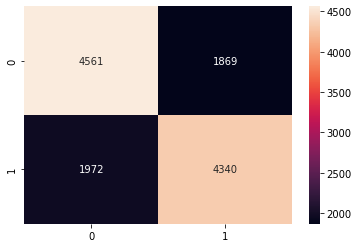

In [ ]:
sns.heatmap(cm,annot=True,fmt='0g')